<a href="https://colab.research.google.com/github/RagabIbrahim/Machine-learning-IBM-course/blob/main/Machine_learning_capastone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [ ]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv


--2021-11-06 03:18:16--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.01s   

2021-11-06 03:18:16 (1.81 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [ ]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2990587350>]],
      dtype=object)

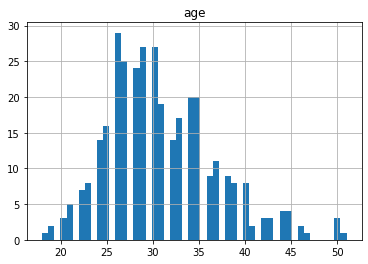

In [ ]:
df.hist(column='age', bins=50)

In [ ]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [ ]:
X = df[['Principal','terms','age','Gender']]
X = pd.concat([X,pd.get_dummies(df['education'])], axis=1)
X.drop(['Master or Above'], axis = 1,inplace=True)
X.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,male,0,1,0
1,1000,30,33,female,1,0,0
2,1000,15,27,male,0,0,1
3,1000,30,28,female,0,0,1
4,1000,30,29,male,0,0,1


In [ ]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [ ]:
X.replace(['male','female'], [0,1],inplace=True)
X.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 7) (276,)
Test set: (70, 7) (70,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 4 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF'],
      dtype=object)

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7536231884057971
Test set Accuracy:  0.6428571428571429


In [ ]:
K = 10
macc = np.zeros((K-1))
sacc = np.zeros((K-1))
for n in range(1,10):
    Knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    Kpr=Knn.predict(X_test)
    macc[n-1] = metrics.accuracy_score(y_test, Kpr)
    sacc[n-1]=np.std(Kpr==y_test)/np.sqrt(Kpr.shape[0])

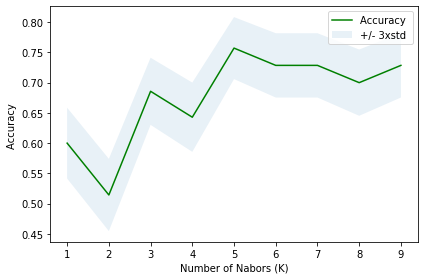

In [ ]:
plt.plot(range(1,K),macc,'g')
plt.fill_between(range(1,K),macc - 1 * sacc,macc + 1 * sacc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", macc.max(), "with k=", macc.argmax()+1) 

The best accuracy was with 0.7571428571428571 with k= 5


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred = Tree.predict(X_test)
pred[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Tree.predict(X_train)))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred))

Train set Accuracy:  0.7463768115942029
DecisionTrees's Accuracy:  0.7857142857142857


In [ ]:
from sklearn import svm

In [ ]:
sv = svm.SVC(probability=True)
sv.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
ysv = sv.predict(X_test)
ysv [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, sv.predict(X_train)))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, ysv))

Train set Accuracy:  0.7427536231884058
DecisionTrees's Accuracy:  0.7857142857142857


In [ ]:
 from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(penalty='l2',C=0.03, solver='liblinear', max_iter=200).fit(X_train,y_train)

In [ ]:
ylr = LR.predict(X_test)
ylr[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, ylr))

Train set Accuracy:  0.7427536231884058
DecisionTrees's Accuracy:  0.7857142857142857


In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
print("jaccard_similarity_score for KNN algo", jaccard_similarity_score(y_test, yhat))

jaccard_similarity_score for KNN algo 0.6428571428571429


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
print("jaccard_similarity_score for Decision Tree algo",jaccard_similarity_score(y_test, pred))

jaccard_similarity_score for Decision Tree algo 0.7857142857142857


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
print("jaccard_similarity_score for SVM algo",jaccard_similarity_score(y_test, ysv))

jaccard_similarity_score for SVM algo 0.7857142857142857


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
print("jaccard_similarity_score for Logistic Regression algo",jaccard_similarity_score(y_test, ylr))

jaccard_similarity_score for Logistic Regression algo 0.7857142857142857


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
print("f1_score for KNN algo",f1_score(y_test, yhat, average='weighted'))


f1_score for KNN algo 0.6540842335234859


In [ ]:
print("f1_score for Decision Tree algo",f1_score(y_test, pred, average='weighted'))


f1_score for Decision Tree algo 0.6914285714285714


In [ ]:
print("f1_score for SVM algo",f1_score(y_test, ysv, average='weighted'))


f1_score for SVM algo 0.6914285714285714


In [ ]:
print("f1_score for logistic Regresssion algo",f1_score(y_test, ylr, average='weighted'))


f1_score for logistic Regresssion algo 0.6914285714285714
